Būsimieji kolegos! Jūsų pasirinktų bandomųjų užduočių atsakymuose labai tikimės pamatyti ne vien
prašomus rezultatus, bet ir jūsų komentarais papildytą R arba Python kompiuterinį kodą, sugeneravusį tuos
rezultatus. Pasirinkite jums tinkamą užduočių sudėtingumo lygį ir pamėginkite jas atlikti kuo geriau. Galite
išmėginti savo jėgas ir kelių lygių užduotyse. Linkime kūrybiškumo, drąsos ir sėkmės!

1. [jaunesnysis duomenų analitikas]. Elektros suvartojimas ir kaina
Energijos skirstymo operatoriaus (ESO) parengti atviri detalūs duomenys apie valandinį elektros energijos
suvartojimą atsitiktinai parinktuose butuose, namuose ir soduose: https://data.gov.lt/datasets/1975/.
Duomenyse yra 1000 objektų (butų, namų, sodų), tačiau tik 106 iš jų turi pilnus valandinius elektros
suvartojimo duomenis (nuo 2020-06-01 00:00:00 iki 2022-06-01 00:00:00). Šiose užduotyse dirbkite tik su
duomenimis iš tų 106 objektų.

A. Kiek elektros energijos (kWh) per 2 metus suvartojo butas 771822 (objekto numeris)?

B. Kiek elektros energijos (kWh) vidutiniškai (mediana) per parą suvartoja vienas butas ir vienas namas
kiekvieną metų mėnesį. Sukurkite lentelę ir iliustraciją pagal šiuos pavyzdžius:

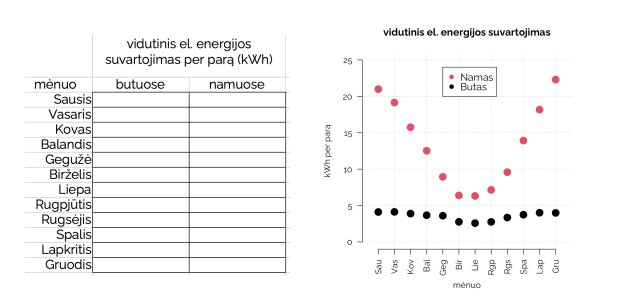

C. Kada 2022 metais buvo brangiausia elektra (data ir valanda) ir kiek ši kaina sudaro procentų nuo
vidutinės tokios valandos elektros energijos kainos tais metais? Elektros energijos valandinių kainų

NordPool biržoje duomenys: https://www.litgrid.eu/index.php/sistemos-duomenys/elektros-energijos-
kainos/86.

********************************* sprendimas ******************

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
# Bendras kelias į katalogą su failais
kelias_iki_failo = Path(r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\duomenys")

# Failų pavadinimai
failai = [
    "2020-06.csv", "2020-07.csv", "2020-08.csv",
    "2020-09.csv", "2020-10.csv", "2020-11.csv", 
    "2020-12.csv", "2021-01.csv", "2021-02.csv", 
    "2021-03.csv", "2021-04.csv", "2021-05.csv", 
    "2021-06.csv", "2021-07.csv", "2021-08.csv", 
    "2021-09.csv", "2021-10.csv", "2021-11.csv", 
    "2021-12.csv", "2022-01.csv", "2022-02.csv",
    "2022-03.csv", "2022-04.csv", "2022-05.csv"
]

# Ta pati failo lokacija nurodoma visiems failams
keliai = [kelias_iki_failo / failas for failas in failai]

# Visi failai sujungiami į vieną DataFrame
visi_duomenys = pd.concat([pd.read_csv(failas) for failas in keliai], ignore_index=True)

print(visi_duomenys.head())

                    TINKLAS OBT_PAVADINIMAS OBJ_GV_TIPAS  OBJ_NUMERIS      P+  \
0   Alytaus regiono tinklas           Namas            G        75064     NaN   
1  Vilniaus regiono tinklas           Namas            G       743382  0.2417   
2   Alytaus regiono tinklas           Butas        Ne GV        37502  0.0500   
3  Vilniaus regiono tinklas           Namas            G       747522  0.4298   
4  Vilniaus regiono tinklas           Namas            G       690996     NaN   

                  PL_T   P-  
0  2020-06-30 00:00:00  NaN  
1  2020-06-30 00:00:00  0.0  
2  2020-06-30 00:00:00  0.0  
3  2020-06-30 00:00:00  0.0  
4  2020-06-30 00:00:00  NaN  


In [4]:
# Duomenys iš visų failų išsaugomi viename faile
visi_duomenys.to_csv(kelias_iki_failo / "visi_duomenys.csv", index=False)

In [5]:
naujas_failas = r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\duomenys\visi_duomenys.csv"
duomenys = pd.read_csv(naujas_failas)
print(duomenys.head())

                    TINKLAS OBT_PAVADINIMAS OBJ_GV_TIPAS  OBJ_NUMERIS      P+  \
0   Alytaus regiono tinklas           Namas            G        75064     NaN   
1  Vilniaus regiono tinklas           Namas            G       743382  0.2417   
2   Alytaus regiono tinklas           Butas        Ne GV        37502  0.0500   
3  Vilniaus regiono tinklas           Namas            G       747522  0.4298   
4  Vilniaus regiono tinklas           Namas            G       690996     NaN   

                  PL_T   P-  
0  2020-06-30 00:00:00  NaN  
1  2020-06-30 00:00:00  0.0  
2  2020-06-30 00:00:00  0.0  
3  2020-06-30 00:00:00  0.0  
4  2020-06-30 00:00:00  NaN  


In [6]:
# Pagrindinės statistikos
print(duomenys.describe())

        OBJ_NUMERIS            P+            P-
count  1.181652e+07  1.118769e+07  9.094005e+06
mean   3.334894e+06  6.532035e-01  4.211271e-01
std    5.785173e+06  1.142229e+00  1.236202e+00
min    1.380000e+03  0.000000e+00  0.000000e+00
25%    2.677660e+05  7.590000e-02  0.000000e+00
50%    5.910200e+05  2.520000e-01  0.000000e+00
75%    3.284436e+06  7.520000e-01  1.260000e-02
max    2.867403e+07  2.910320e+01  2.574190e+01


In [7]:
# Trūkstamų reikšmių kiekiai
print(duomenys.isnull().sum())

TINKLAS                  0
OBT_PAVADINIMAS          0
OBJ_GV_TIPAS             0
OBJ_NUMERIS              0
P+                  628831
PL_T                     0
P-                 2722515
dtype: int64


In [8]:
# 24 valandos, 365 dienos per metus. lygiai dviejų metų laikotarpis
print(24 * 365 * 2)

17520


In [ ]:
objektu_irasu_skaicius = visi_duomenys.groupby('OBJ_NUMERIS').size()

# Filtruojame tik objektus, kurie turi 17520 įrašų
pilni_objektai = objektu_irasu_skaicius[objektu_irasu_skaicius == 17520].index

pilnu_duomenu_df = visi_duomenys[visi_duomenys['OBJ_NUMERIS'].isin(pilni_objektai)]

print(f"Pilnų objektų skaičius: {len(pilni_objektai)}")
print(f"Pilnų objektų sąrašas:\n{pilni_objektai}")

Pilnų objektų skaičius: 493
Pilnų objektų sąrašas:
Index([  1380,   6300,   8040,   9600,  10080,  17462,  22562,  22982,  23102,
        23882,
       ...
       854812, 854992, 855292, 858472, 859552, 860632, 860932, 862252, 862312,
       863152],
      dtype='int64', name='OBJ_NUMERIS', length=493)


In [10]:
# Patikrinimas ar duomenys nesikartoja
print(pilnu_duomenu_df['OBJ_NUMERIS'].nunique())

493


In [11]:
print(pilnu_duomenu_df.head(5))

                    TINKLAS OBT_PAVADINIMAS OBJ_GV_TIPAS  OBJ_NUMERIS      P+  \
0   Alytaus regiono tinklas           Namas            G        75064     NaN   
1  Vilniaus regiono tinklas           Namas            G       743382  0.2417   
2   Alytaus regiono tinklas           Butas        Ne GV        37502  0.0500   
3  Vilniaus regiono tinklas           Namas            G       747522  0.4298   
4  Vilniaus regiono tinklas           Namas            G       690996     NaN   

                  PL_T   P-  
0  2020-06-30 00:00:00  NaN  
1  2020-06-30 00:00:00  0.0  
2  2020-06-30 00:00:00  0.0  
3  2020-06-30 00:00:00  0.0  
4  2020-06-30 00:00:00  NaN  


In [ ]:
pilnu_duomenu_df_be_nan = pilnu_duomenu_df.dropna(subset=['P+'])

print(f"NaN reikšmės `P+` stulpelyje po filtravimo: {pilnu_duomenu_df_be_nan['P+'].isnull().sum()}")
print(pilnu_duomenu_df_be_nan.head(5))

NaN reikšmės `P+` stulpelyje po filtravimo: 0
                     TINKLAS OBT_PAVADINIMAS OBJ_GV_TIPAS  OBJ_NUMERIS  \
1   Vilniaus regiono tinklas           Namas            G       743382   
2    Alytaus regiono tinklas           Butas        Ne GV        37502   
3   Vilniaus regiono tinklas           Namas            G       747522   
5   Vilniaus regiono tinklas           Butas        Ne GV       600022   
6  Klaipėdos regiono tinklas           Butas        Ne GV       346496   

       P+                 PL_T   P-  
1  0.2417  2020-06-30 00:00:00  0.0  
2  0.0500  2020-06-30 00:00:00  0.0  
3  0.4298  2020-06-30 00:00:00  0.0  
5  0.0230  2020-06-30 00:00:00  NaN  
6  1.2742  2020-06-30 00:00:00  NaN  


In [ ]:
duomenys_be_nan = visi_duomenys.dropna(subset=['P+'])

objektu_irasu_skaicius_be_nan = duomenys_be_nan.groupby('OBJ_NUMERIS').size()

pilni_objektai_be_nan = objektu_irasu_skaicius_be_nan[objektu_irasu_skaicius_be_nan == 17520].index

pilnu_duomenu_df_be_nan = duomenys_be_nan[duomenys_be_nan['OBJ_NUMERIS'].isin(pilni_objektai_be_nan)]

print(f"Pilnų objektų kiekis be NaN reikšmių: {len(pilni_objektai_be_nan)}")
print(f"Pilnų objektų sąrašas:\n{pilni_objektai_be_nan}")

Pilnų objektų kiekis be NaN reikšmių: 106
Pilnų objektų sąrašas:
Index([ 37082,  37142,  37502,  40202,  44282,  46502,  46622,  56582,  92348,
       111788,
       ...
       771822, 779502, 784422, 802542, 802602, 823968, 854812, 854992, 859552,
       862312],
      dtype='int64', name='OBJ_NUMERIS', length=106)


In [14]:
pilnu_duomenu_df_be_nan.to_csv("paruošti_duomenys.csv", index=False)

In [15]:
failo_kelias_1 = r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\paruošti_duomenys.csv"
paruošti_duomenys = pd.read_csv(failo_kelias_1)
print(paruošti_duomenys.head())

                    TINKLAS OBT_PAVADINIMAS OBJ_GV_TIPAS  OBJ_NUMERIS      P+  \
0   Alytaus regiono tinklas           Butas        Ne GV        37502  0.0500   
1  Vilniaus regiono tinklas           Butas        Ne GV       600022  0.0230   
2   Šiaulių regiono tinklas           Namas            G       859552  0.4135   
3     Kauno regiono tinklas           Butas            N       197974  0.1058   
4  Vilniaus regiono tinklas           Butas        Ne GV       535458  0.0400   

                  PL_T   P-  
0  2020-06-30 00:00:00  0.0  
1  2020-06-30 00:00:00  NaN  
2  2020-06-30 00:00:00  0.0  
3  2020-06-30 00:00:00  0.0  
4  2020-06-30 00:00:00  NaN  


In [16]:
print(paruošti_duomenys.describe())

        OBJ_NUMERIS            P+             P-
count  1.857120e+06  1.857120e+06  858480.000000
mean   4.970330e+05  4.096410e-01       0.371263
std    2.210981e+05  8.470287e-01       1.089770
min    3.708200e+04  0.000000e+00       0.000000
25%    3.427760e+05  5.200000e-02       0.000000
50%    5.770980e+05  1.400000e-01       0.000000
75%    6.285820e+05  3.770000e-01       0.005800
max    8.623120e+05  2.014880e+01      13.643300


In [ ]:
butas_771822 = paruošti_duomenys[paruošti_duomenys['OBJ_NUMERIS'] == 771822]
bendra_suvartota_kwh = butas_771822['P+'].sum()
print(f"Butas 771822 per 2 metus suvartojo: {bendra_suvartota_kwh:.2f} kWh")

Butas 771822 per 2 metus suvartojo: 3046.78 kWh


A) Butas 771822 per 2 metus suvartojo: 3046.78 kWh

In [ ]:
#  Iš csv failo įsikeliami duomenys
failo_kelias = r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\paruošti_duomenys.csv"
duomenys = pd.read_csv(failo_kelias)

duomenys['PL_T'] = pd.to_datetime(duomenys['PL_T'])

duomenys['Data'] = duomenys['PL_T'].dt.date
duomenys['Mėnuo'] = duomenys['PL_T'].dt.month

# Grupavimas pagal objektų pavadinimą, numerį ir datą, tada apskaičiuojamas dienos suvartojimas
dienos_suvartojimas = duomenys.groupby(['OBT_PAVADINIMAS', 'OBJ_NUMERIS', 'Data'])['P+'].sum().reset_index()

dienos_suvartojimas['Mėnuo'] = pd.to_datetime(dienos_suvartojimas['Data']).dt.month

mediana_suvartojimas = dienos_suvartojimas.groupby(['OBT_PAVADINIMAS', 'Mėnuo'])['P+'].median().reset_index()

# Dėl aiškumo pervadinu stulpelius
mediana_suvartojimas.columns = ['Objekto tipas', 'Mėnuo', 'Mediana kWh per parą']
# išfiltruojami tik butų arba tik namų duomenys
butai = mediana_suvartojimas[mediana_suvartojimas['Objekto tipas'] == 'Butas']
namai = mediana_suvartojimas[mediana_suvartojimas['Objekto tipas'] == 'Namas']

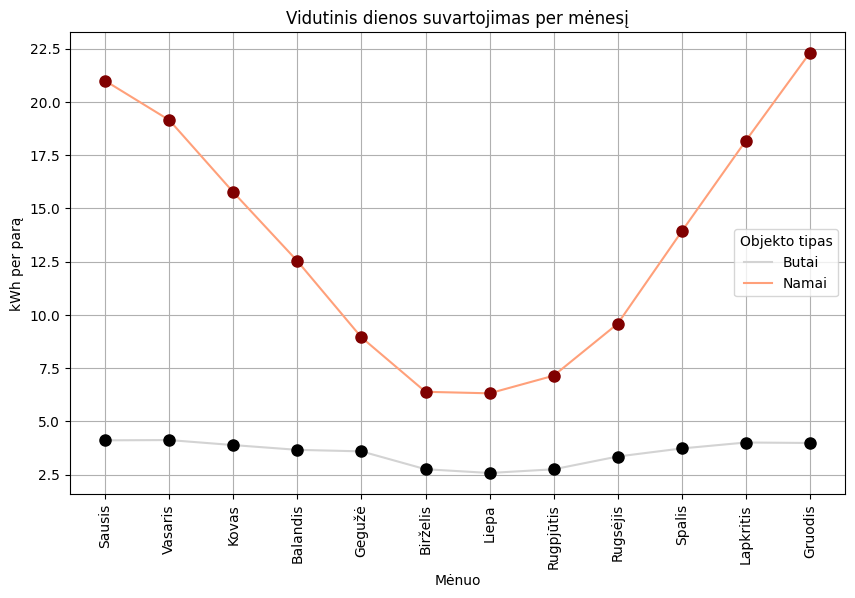

In [ ]:
# Grafiko dydis
plt.figure(figsize=(10, 6))
# Nubraižomas vidutinis butų suvartojimas
plt.plot(butai['Mėnuo'], butai['Mediana kWh per parą'], color='lightgray', label='Butai')
plt.plot(butai['Mėnuo'], butai['Mediana kWh per parą'], marker='o', color='black', markersize=8, linestyle='')

plt.plot(namai['Mėnuo'], namai['Mediana kWh per parą'], color='lightsalmon', label='Namai')
plt.plot(namai['Mėnuo'], namai['Mediana kWh per parą'], marker='o', color='maroon', markersize=8, linestyle='')

plt.title("Vidutinis dienos suvartojimas per mėnesį")
plt.xlabel("Mėnuo")
plt.ylabel("kWh per parą")
plt.xticks(range(1, 13), ['Sausis', 'Vasaris', 'Kovas', 'Balandis', 'Gegužė', 'Birželis', 'Liepa', 'Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis'], rotation=90)
plt.grid(True)
# Nurodoma legenda
plt.legend(title="Objekto tipas")
plt.show()

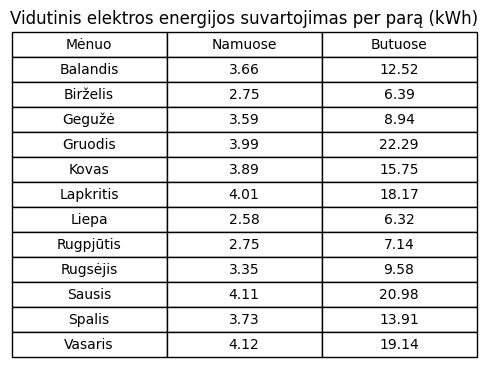

In [ ]:
menesiu_pavadinimai = {
    1: 'Sausis', 2: 'Vasaris', 3: 'Kovas', 4: 'Balandis',
    5: 'Gegužė', 6: 'Birželis', 7: 'Liepa', 8: 'Rugpjūtis',
    9: 'Rugsėjis', 10: 'Spalis', 11: 'Lapkritis', 12: 'Gruodis'
}
# Pakeičiamos 'Mėnuo' stulpelio reikšmes į mėnesių pavadinimus
mediana_suvartojimas['Mėnuo'] = mediana_suvartojimas['Mėnuo'].map(menesiu_pavadinimai)

lenteles_duomenys = mediana_suvartojimas.pivot(index='Mėnuo', columns='Objekto tipas', values='Mediana kWh per parą').reset_index()

# Suapvalinami skaičiai stulpeliuose
lenteles_duomenys.iloc[:, 1:] = lenteles_duomenys.iloc[:, 1:].round(2)

fig, ax = plt.subplots(figsize=(4, 4))
ax.axis('off')

stulpeliu_pavadinimai = ["Mėnuo", "Namuose", "Butuose"]

lentele = ax.table(cellText=lenteles_duomenys.values, colLabels=stulpeliu_pavadinimai, cellLoc='center', loc='center')

# Nustatomas lentelės šrifto dydis, nurodomas pavadinimas
lentele.set_fontsize(10)
lentele.scale(1.5, 1.5)
plt.title("Vidutinis elektros energijos suvartojimas per parą (kWh)", pad=12)
plt.show()

C) Kada 2022 metais buvo brangiausia elektra (data ir valanda) ir kiek ši kaina sudaro procentų nuo
vidutinės tokios valandos elektros energijos kainos tais metais? Elektros energijos valandinių kainų

NordPool biržoje duomenys: https://www.litgrid.eu/index.php/sistemos-duomenys/elektros-energijos-
kainos/86.

su exeliu atsidariau failą tada jį išsaugojau csv formatu

In [ ]:
# Kaip atrodo pirmosios eilutės failo
csv_failo_kelias = r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\dashboard_data_2022-01-01_2022-12-31.csv"
duomenys = pd.read_csv(csv_failo_kelias)
print(duomenys.head(5))

            Unnamed: 0  Nord Pool Lietuva
0  2022-01-01 00:00:00              57.98
1  2022-01-01 01:00:00              50.05
2  2022-01-01 02:00:00              41.33
3  2022-01-01 03:00:00              42.18
4  2022-01-01 04:00:00              44.37


In [25]:
duomenys.describe()

,Nord Pool Lietuva
count,8760.000000
mean,230.237761
std,154.605413
min,-0.040000
25%,120.890000
50%,197.350000
75%,306.460000
max,4000.000000


In [ ]:
# Kaip atrodo pervadinit duomenys
duomenys.rename(columns={'Unnamed: 0': 'Laikas'}, inplace=True)
duomenys.rename(columns={'Nord Pool Lietuva': 'Kaina'}, inplace=True)
print(duomenys.head(5))

               Laikas  Kaina
0 2022-01-01 00:00:00  57.98
1 2022-01-01 01:00:00  50.05
2 2022-01-01 02:00:00  41.33
3 2022-01-01 03:00:00  42.18
4 2022-01-01 04:00:00  44.37


In [ ]:
max_kaina = duomenys['Kaina'].max()
max_kaina_data = duomenys.loc[duomenys['Kaina'] == max_kaina, 'Laikas'].iloc[0]

vidutine_kaina = duomenys['Kaina'].mean()

print(f"Brangiausia elektra 2022 metais buvo {max_kaina_data}, kaina {max_kaina:.2f} EUR/MWh.")
print(f"Vidutinė elektros kaina 2022 metais buvo {vidutine_kaina:.2f} EUR/MWh.")

Brangiausia elektra 2022 metais buvo 2022-08-17 18:00:00, kaina 4000.00 EUR/MWh.
Vidutinė elektros kaina 2022 metais buvo 230.24 EUR/MWh.


In [ ]:
procentas = (max_kaina / vidutine_kaina) * 100
print(f"Didžiausia kaina sudaro {procentas:.2f}% nuo vidutinės kainos.")

Didžiausia kaina sudaro 1737.33% nuo vidutinės kainos.


In [ ]:
kartu_didesne = max_kaina / vidutine_kaina
print(f"Didžiausia kaina yra {kartu_didesne:.2f} karto(-ų) didesnė už vidutinę kainą.")

Didžiausia kaina yra 17.37 karto(-ų) didesnė už vidutinę kainą.
